# Atividade Prática - Heart Disease

- Base de dados: https://www.kaggle.com/johnsmith88/heart-disease-dataset

In [1]:
#Import the bibs
import numpy as np
import pandas
from scipy import stats
from matplotlib import pyplot
dados = pandas.read_csv('bases/heart.csv')

In [2]:
#Split dataset
attributes = dados.columns
#print('Attributes', attributes)
data = dados.values

In [9]:
type(dados.columns)

pandas.core.indexes.base.Index

In [4]:
len(attributes)

14

In [10]:
attributes

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
dados

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
type(dados)

pandas.core.frame.DataFrame

In [12]:
#Apresentation of the dataset
dados.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
dados.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## 1) Apresentar a média, moda, variância e desvio padrão para todos os atributos contı́nuos;

In [17]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [18]:
dados.var()

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

In [20]:
dados.mode().T

,0,1
age,58.0,NaN
sex,1.0,NaN
cp,0.0,NaN
trestbps,120.0,NaN
chol,204.0,234.0
fbs,0.0,NaN
restecg,1.0,NaN
thalach,162.0,NaN
exang,0.0,NaN
oldpeak,0.0,NaN


## 2) Apresentar os valores da mediana e quartil utilizando o gráfico de caixas (boxplot) para o atributo Old peak ST ;

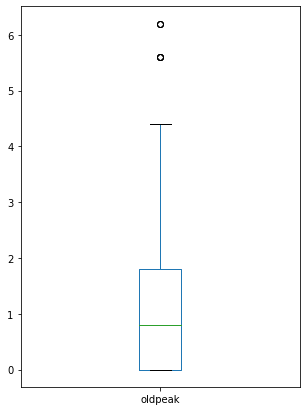

In [25]:
boxplot = dados.boxplot(column=['oldpeak'], figsize=(5,7), grid=False)

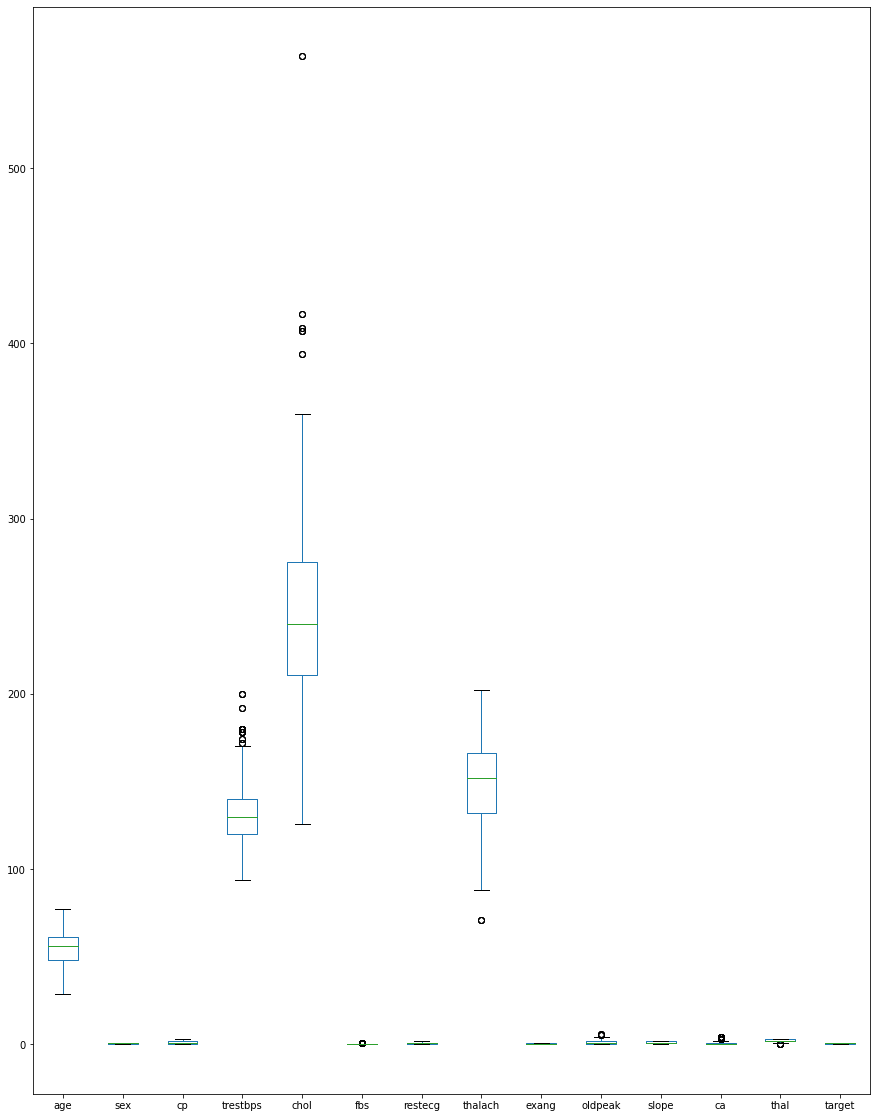

In [26]:
boxplot = dados.boxplot(figsize=(15,20), grid=False)

## 3) Gerar histogramas para os atributos discretos.

In [27]:
dados = dados.drop(columns=['oldpeak'])

In [31]:
type(dados)

pandas.core.frame.DataFrame

In [32]:
dados.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

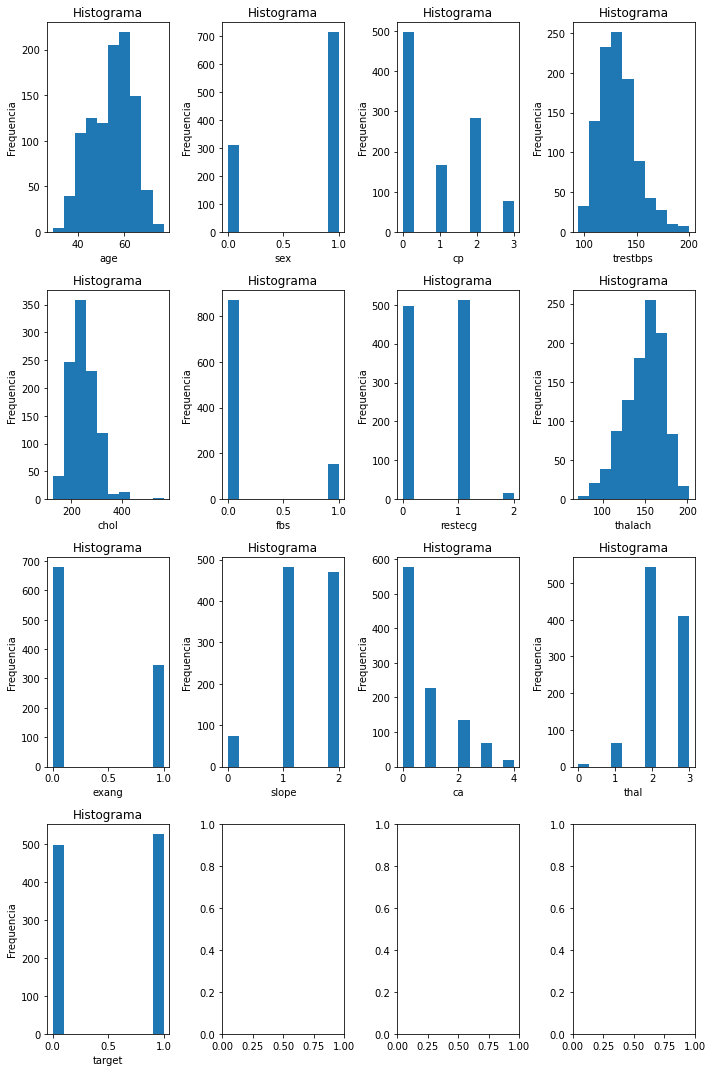

In [39]:
f, ax = pyplot.subplots(4,4)
ax = ax.flatten()
tam = len(attributes)

for column, posicao in zip(dados, range(0, tam-1, 1)) :
    #print(column,posicao)
    ax[posicao].hist(dados[column])
    ax[posicao].set_title('Histograma')
    ax[posicao].set_ylabel('Frequencia')
    ax[posicao].set_xlabel(column)

pyplot.tight_layout()    
pyplot.rcParams["figure.figsize"] = (10,10)
pyplot.show()    